In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


### Preprocesamiento de Datos

In [66]:
# load the data
df_power = pd.read_csv('household_power_consumption.txt',
                       sep=';', header=0, low_memory=False, na_values=['nan', '?'],
                       infer_datetime_format=True, parse_dates={'datetime': [0, 1]},
                       index_col=['datetime'])

# Print first five records of dataframe
df_power.head()


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [3]:
# Print shape of dataset (No. of rows and No. of Columns)

df_power.shape


(2075259, 7)

In [4]:
# Print last five records of dataframe

df_power.tail()


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2010-11-26 20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2010-11-26 20:59:00,0.944,0.0,240.00,4.0,0.0,0.0,0.0
2010-11-26 21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2010-11-26 21:01:00,0.934,0.0,239.70,3.8,0.0,0.0,0.0
2010-11-26 21:02:00,0.932,0.0,239.55,3.8,0.0,0.0,0.0


In [5]:
# Show null/NaN values in each column

df_power.isnull().sum()


Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [67]:
# Null values are in between records, so we can replace null values with previous value

df_power.fillna(method='ffill', inplace=True)


In [7]:
# Show null values in each column
df_power.isnull().sum()


Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [8]:
# Data types of all columns

df_power.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 126.7 MB


### Análisis Exploratorio de Datos

In [68]:
# Group by day

df_power_day = df_power.resample('D').mean()

# Print first five records of dataframe

df_power_day.head()


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16,3.053475,0.088187,236.243763,13.082828,0.000000,1.378788,12.439394
2006-12-17,2.354486,0.156949,240.087028,9.999028,1.411806,2.907639,9.264583
2006-12-18,1.530435,0.112356,241.231694,6.421667,0.738194,1.820139,9.734722
2006-12-19,1.157079,0.104821,241.999313,4.926389,0.582639,5.279167,4.303472
2006-12-20,1.545658,0.111804,242.308062,6.467361,0.000000,1.838889,9.765972


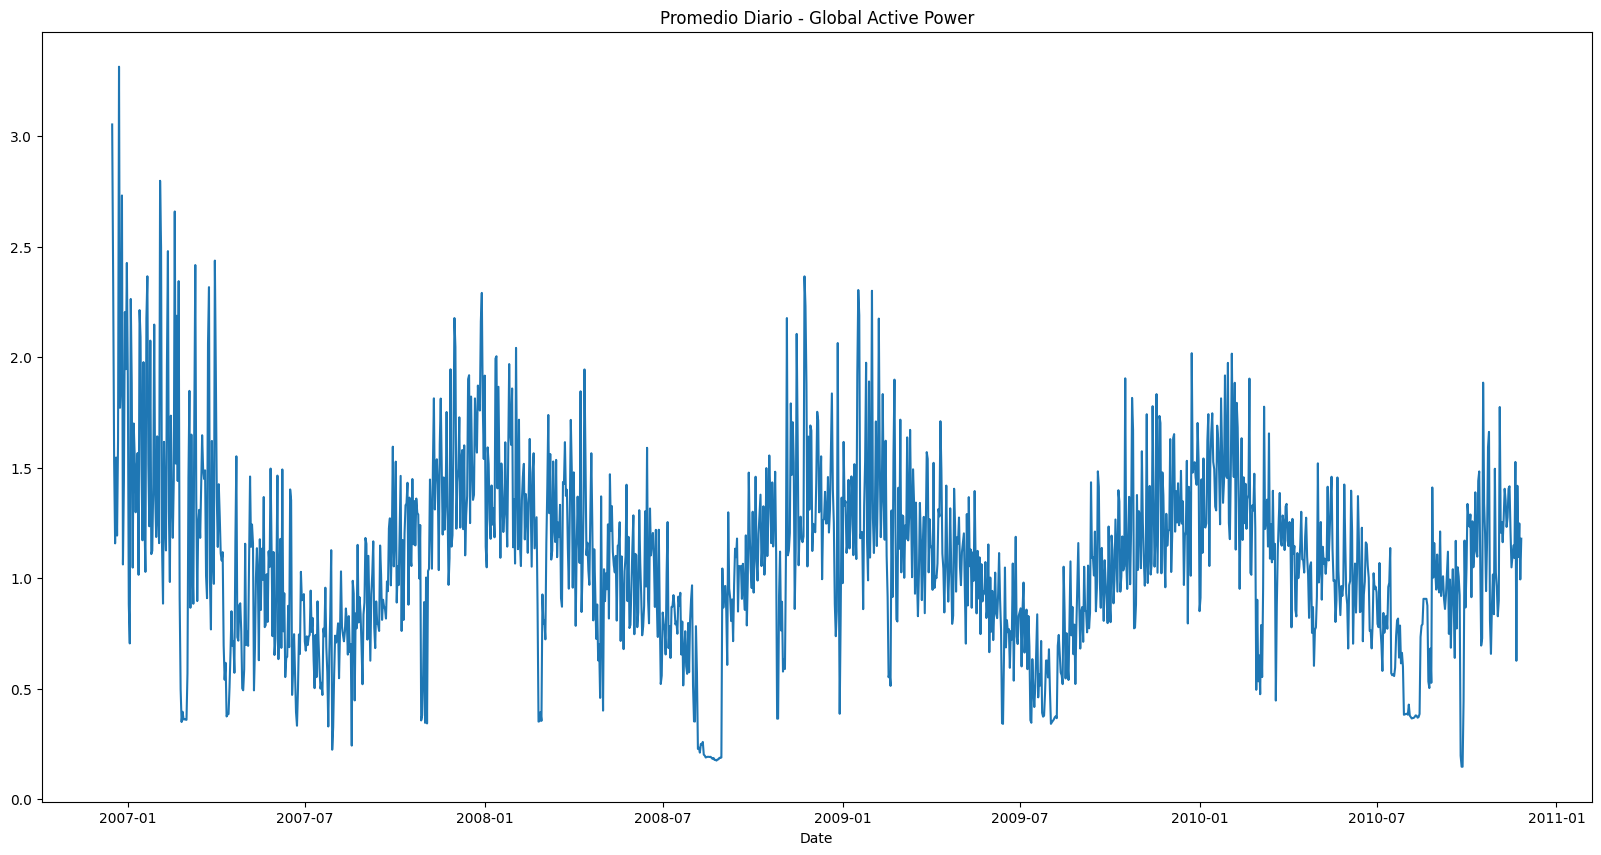

In [10]:
# Plot the data with target Global_active_power as y-axis and datetime as x-axis with line plot

plt.figure(figsize=(20, 10))
plt.plot(df_power_day.index, df_power_day['Global_active_power'])
plt.xlabel('Date')
# plt.ylabel('Global Active Power')
plt.title('Promedio Diario - Global Active Power')
plt.show()


In [69]:
# Split the data into new dataframe with only Global_active_power column

df_active_power = df_power_day[['Global_active_power']]


In [12]:
# Show statistics of Global_active_power column grouped by year

df_active_power.groupby(df_active_power.index.year).describe()


Global_active_power                                          \
                       count      mean       std       min       25%   
datetime                                                               
2006                    16.0  1.953734  0.677176  1.061639  1.507659   
2007                   365.0  1.112505  0.483281  0.222997  0.746032   
2008                   366.0  1.072285  0.419847  0.173818  0.840562   
2009                   365.0  1.072504  0.362957  0.340000  0.840212   
2010                   330.0  1.049842  0.349295  0.146000  0.833385   

                                        
               50%       75%       max  
datetime                                
2006      1.837893  2.372496  3.314851  
2007      1.047485  1.401224  2.798418  
2008      1.102958  1.309603  2.365819  
2009      1.053375  1.279978  2.304042  
2010      1.051967  1.256123  2.015982

In [70]:
# Since the year 2006 has very few records to make an annual comparison, these values ​​are dropped

df_active_power = df_active_power[df_active_power.index.year != 2006]


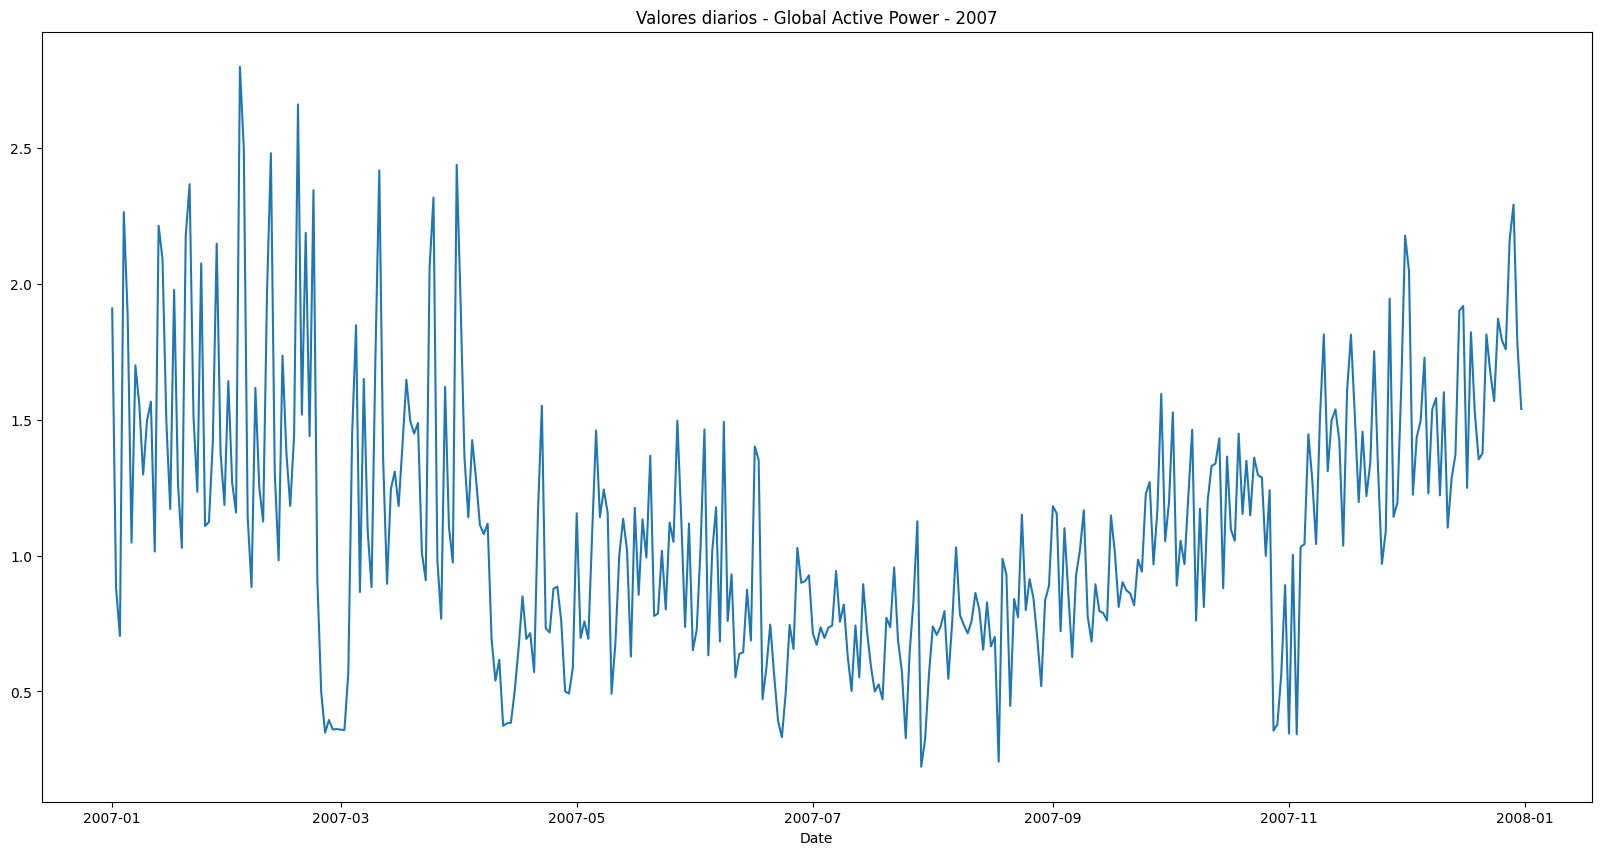

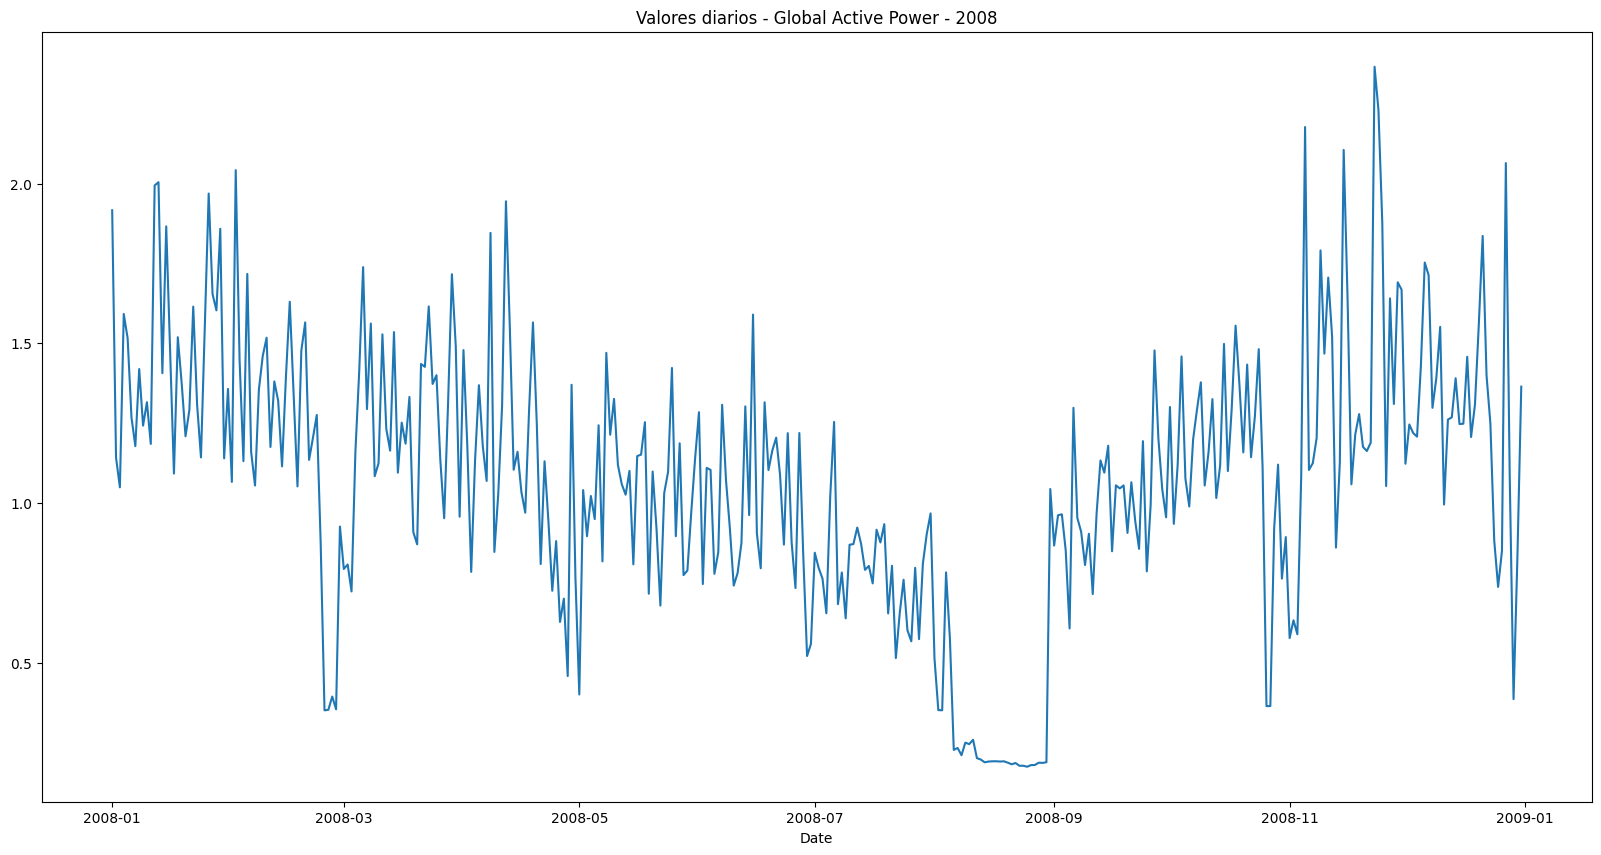

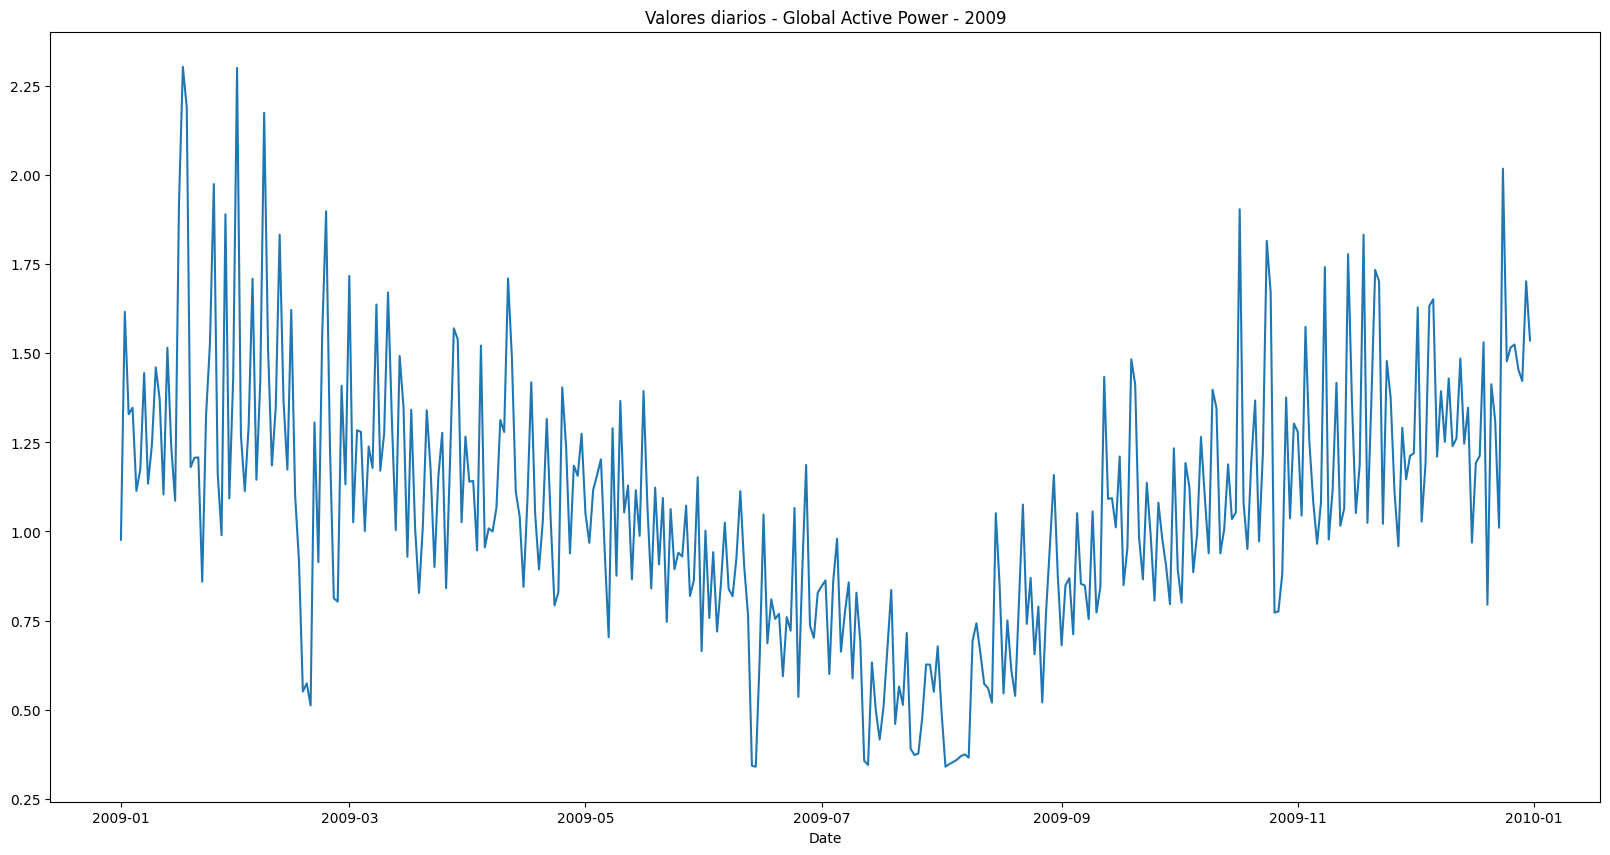

In [14]:
# Plot the yearly data by year with target Global_active_power as y-axis and datetime as x-axis with line plot

for i in range(2007, 2010):
    plt.figure(figsize=(20, 10))
    plt.plot(df_active_power[df_active_power.index.year == i].index,
             df_active_power[df_active_power.index.year == i]['Global_active_power'])
    plt.xlabel('Date')
    # plt.ylabel('Global Active Power')
    plt.title(f'Valores diarios - Global Active Power - {i}')
    plt.show()


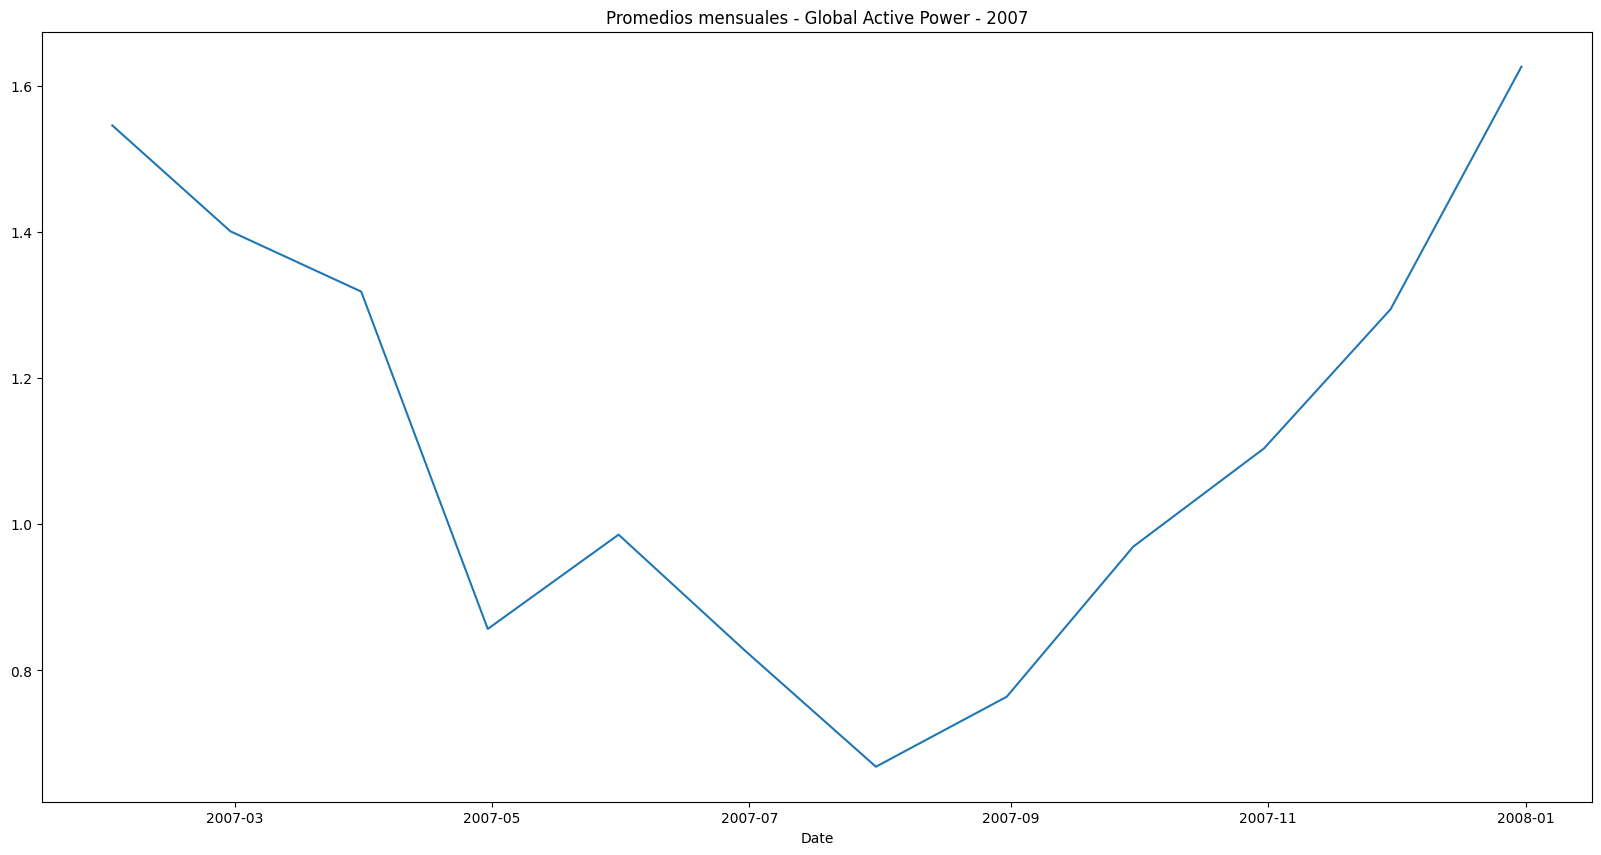

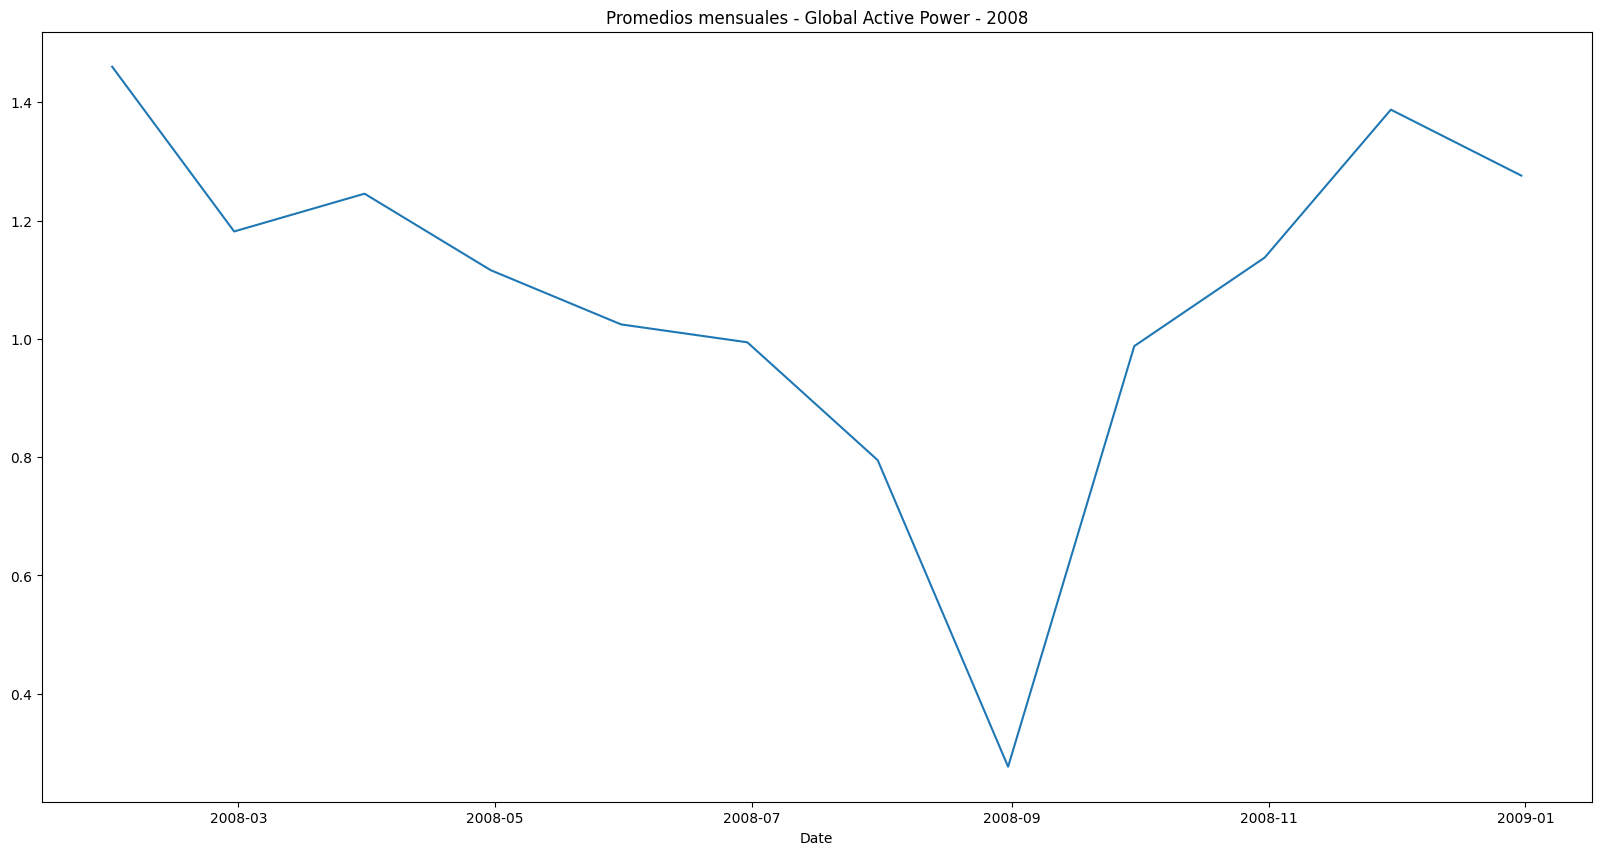

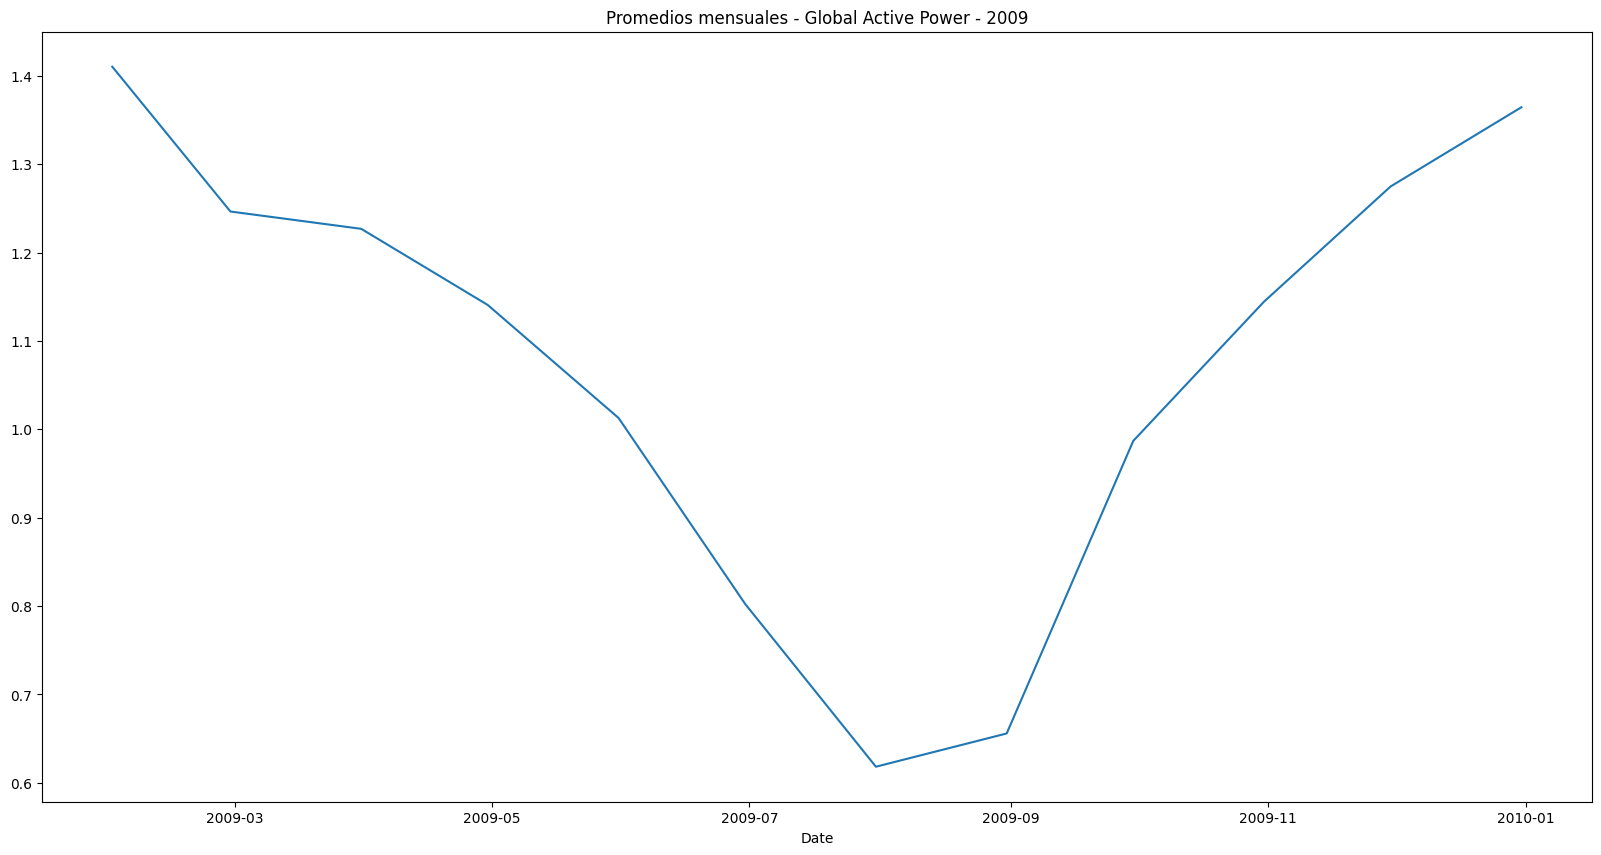

In [15]:
# Plot the monthly data by year with target Global_active_power as y-axis and datetime as x-axis with line plot

for i in range(2007, 2010):
    plt.figure(figsize=(20, 10))
    plt.plot(df_active_power[df_active_power.index.year == i]['Global_active_power'].resample('M').mean().index,
             df_active_power[df_active_power.index.year == i]['Global_active_power'].resample('M').mean())
    plt.xlabel('Date')
    # plt.ylabel('Global Active Power')
    plt.title(f'Promedios mensuales - Global Active Power - {i}')
    plt.show()


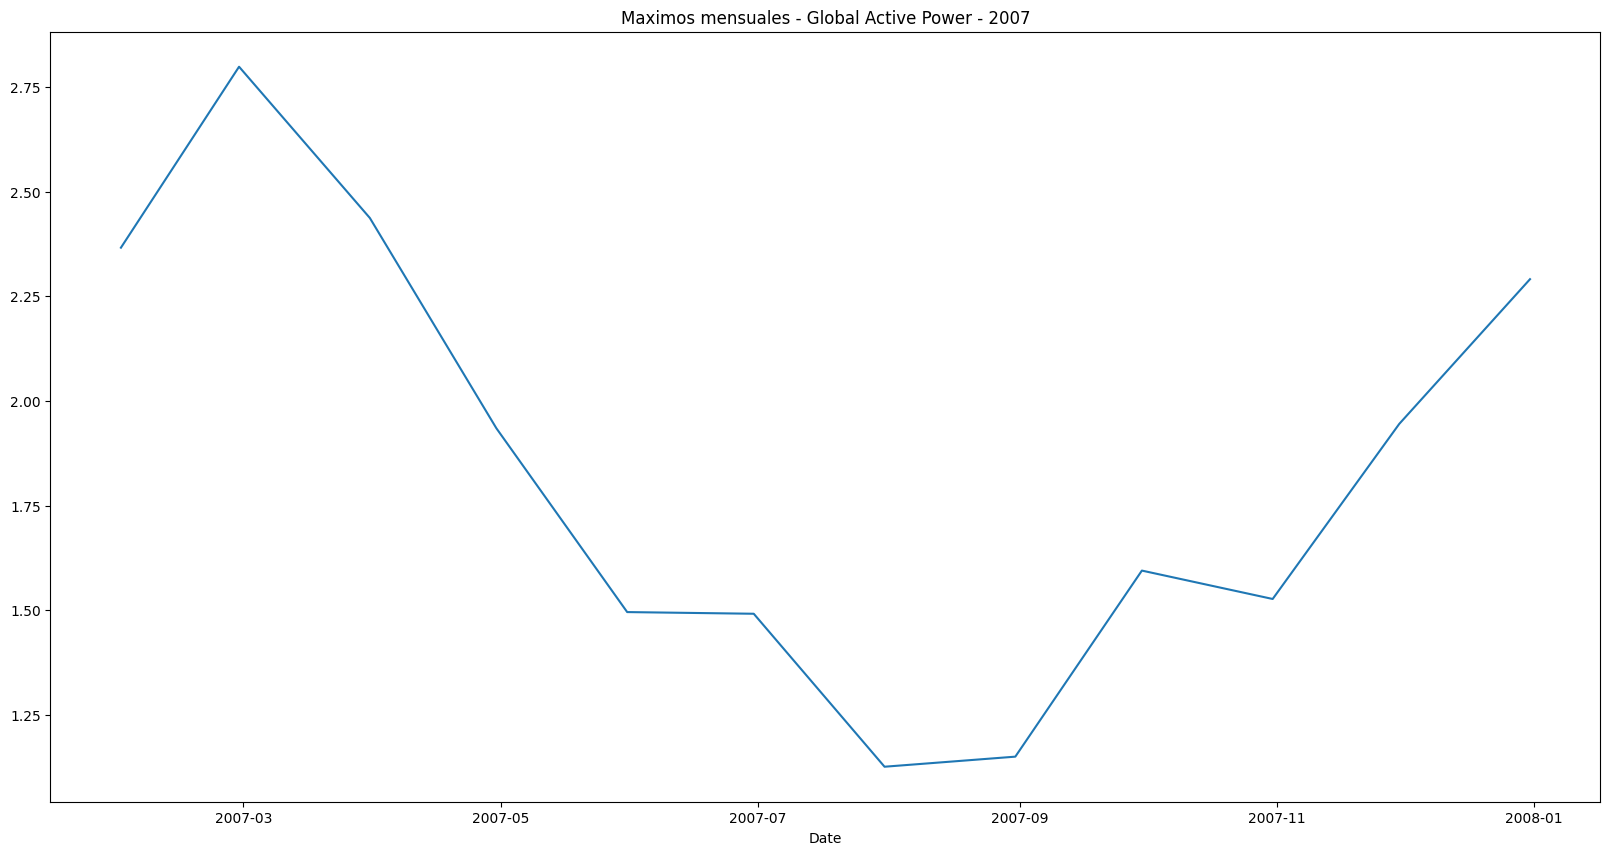

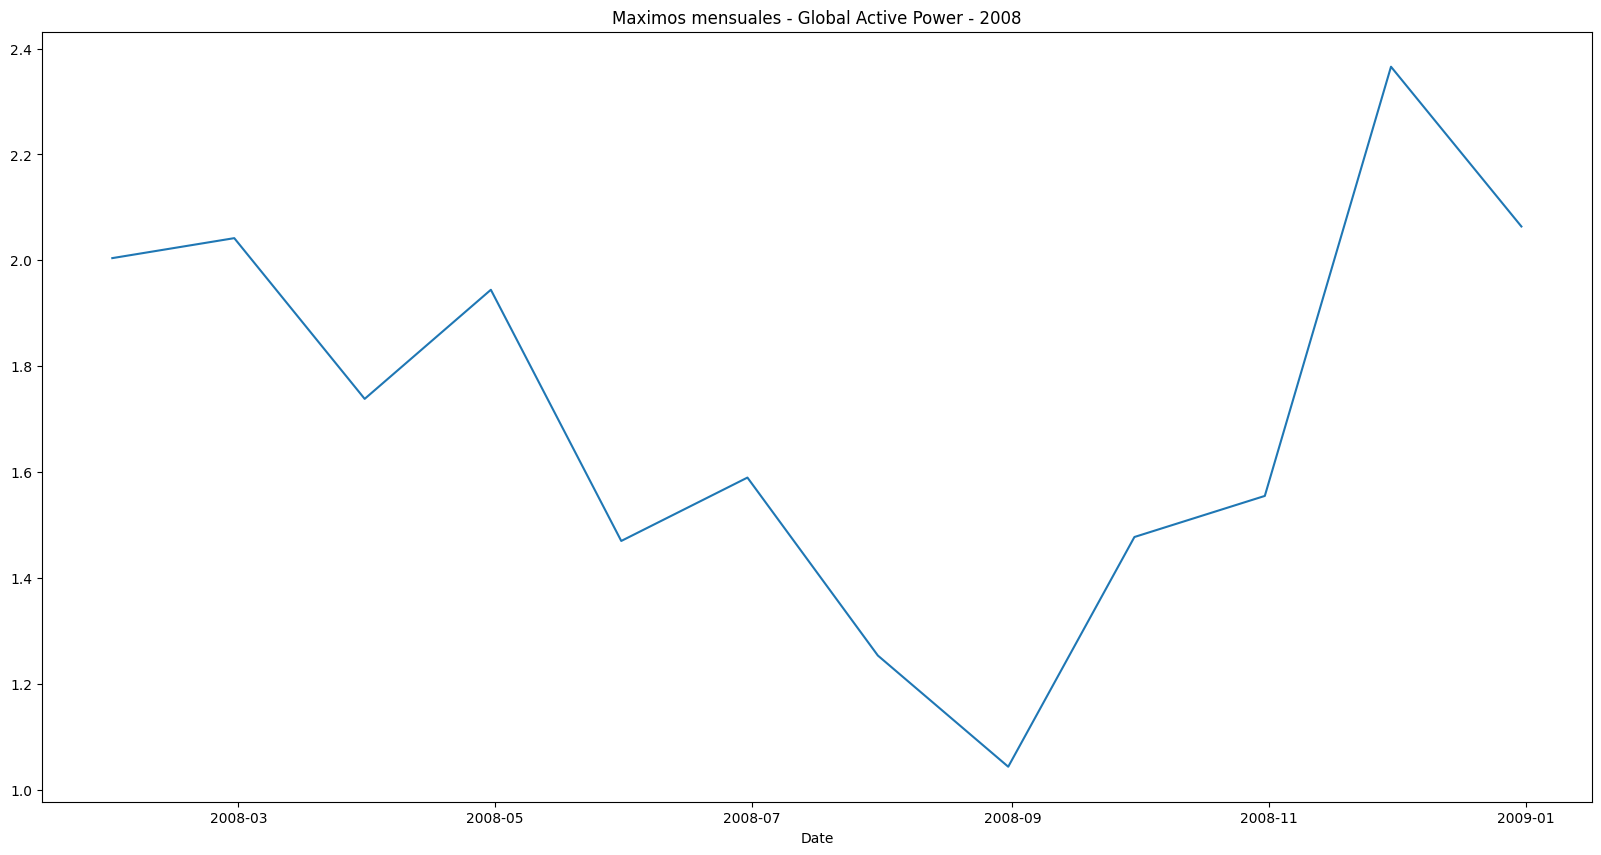

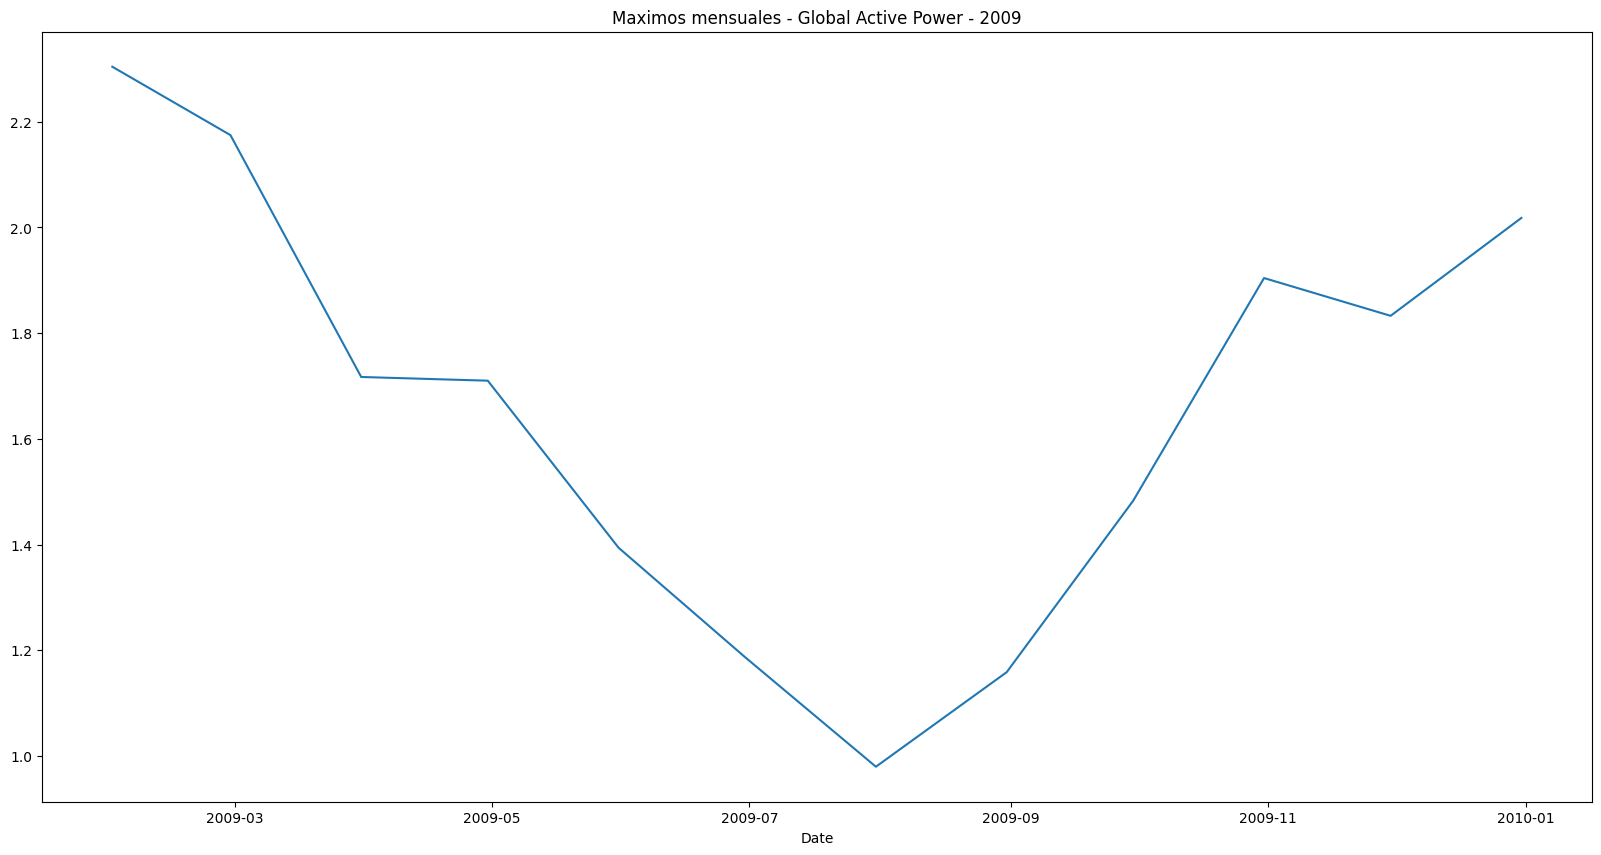

In [16]:
# Plot the monthly data by year with target Global_active_power as y-axis and datetime as x-axis with line plot

for i in range(2007, 2010):
    plt.figure(figsize=(20, 10))
    plt.plot(df_active_power[df_active_power.index.year == i]['Global_active_power'].resample('M').max().index,
             df_active_power[df_active_power.index.year == i]['Global_active_power'].resample('M').max())
    plt.xlabel('Date')
    # plt.ylabel('Global Active Power')
    plt.title(f'Maximos mensuales - Global Active Power - {i}')
    plt.show()


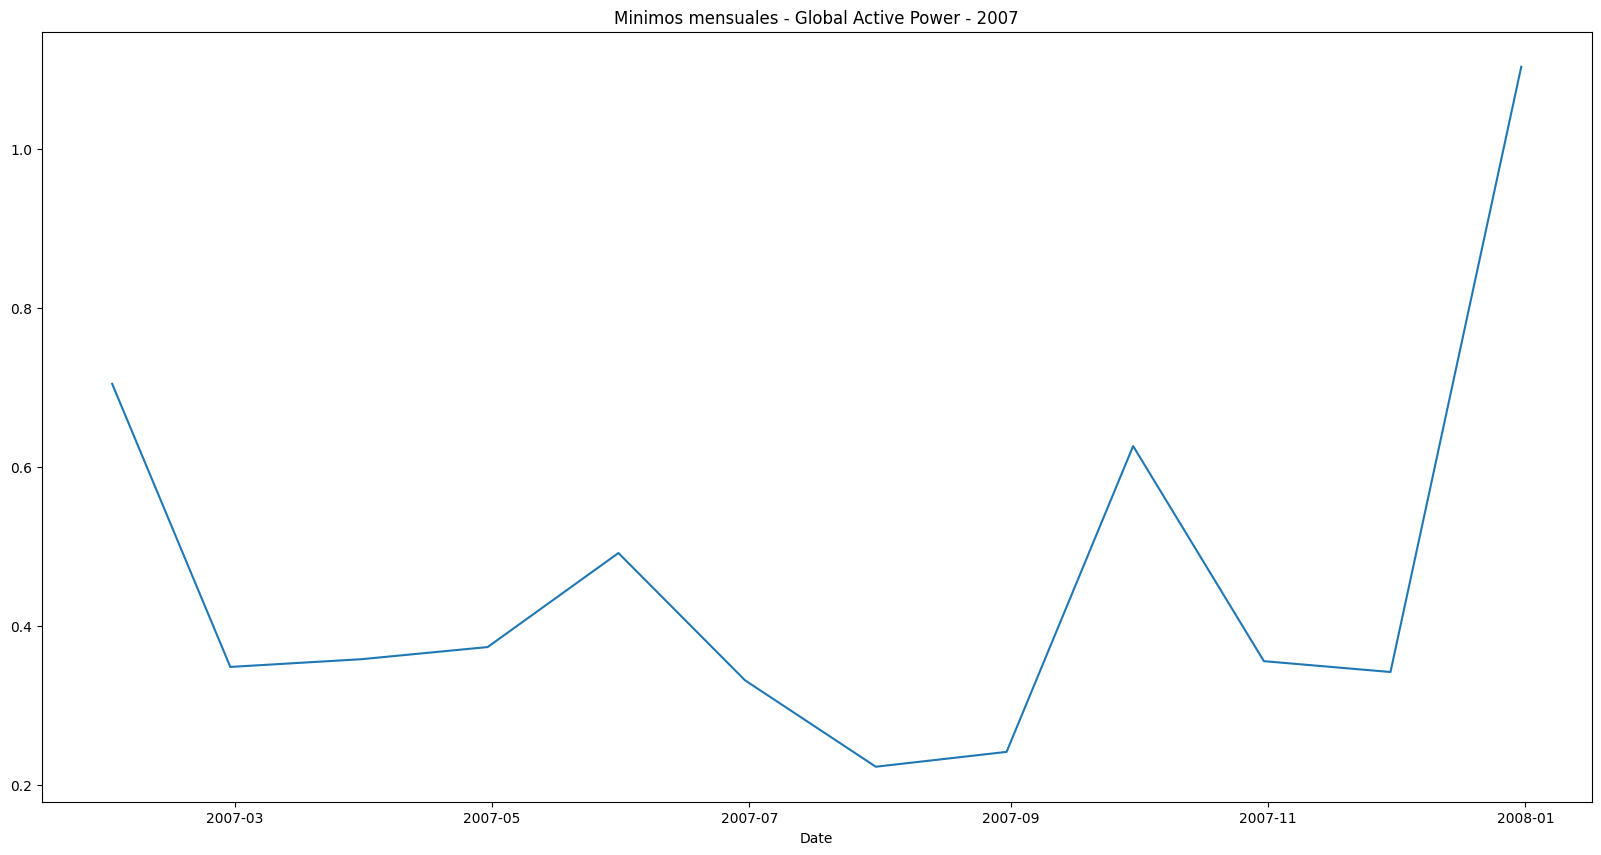

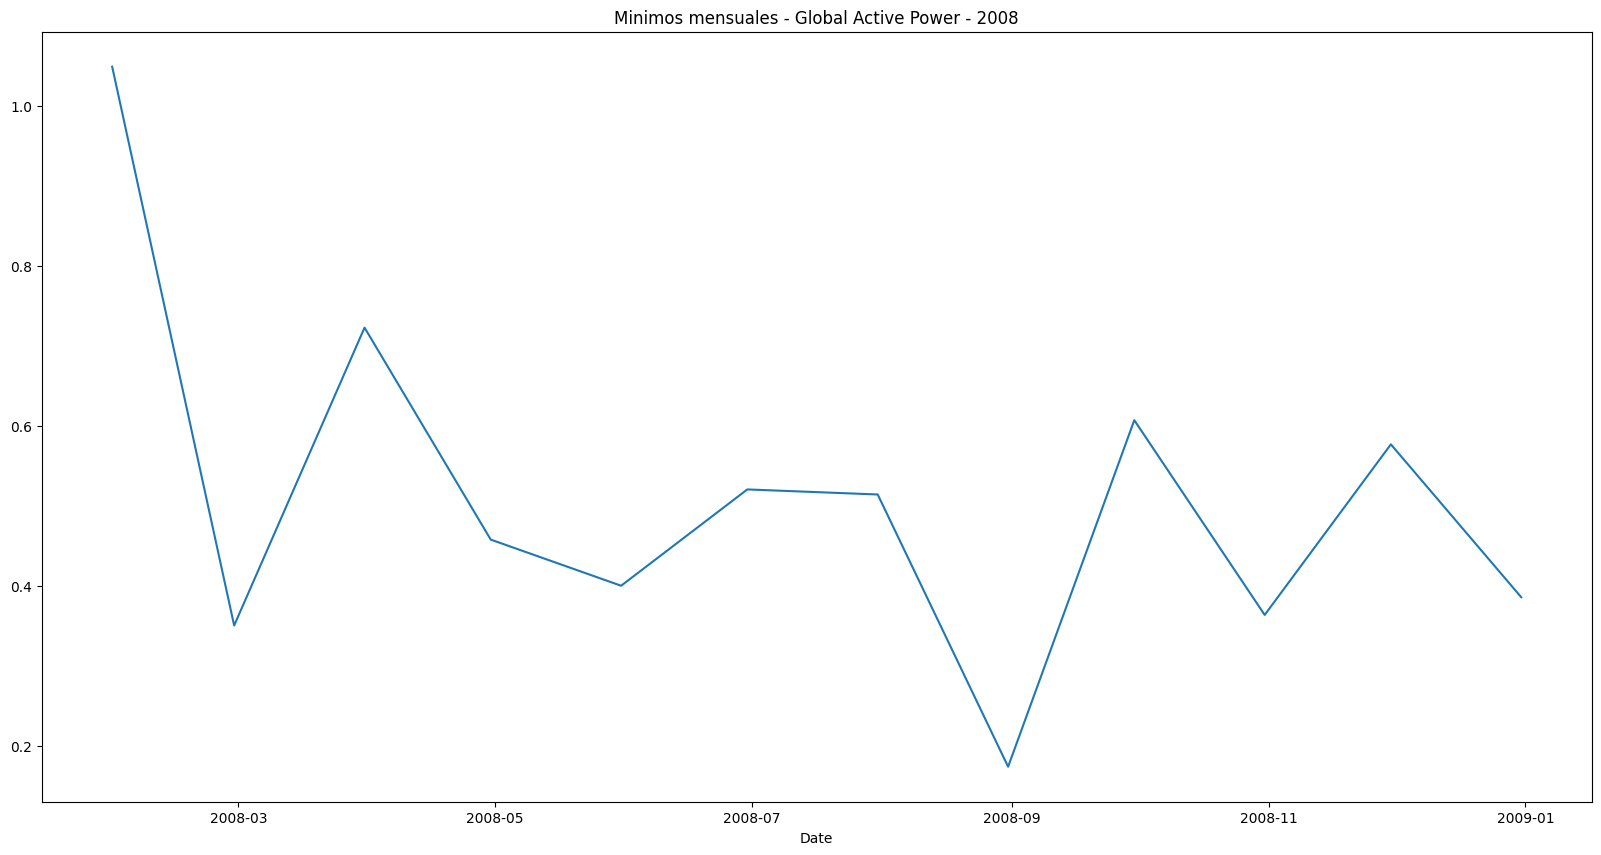

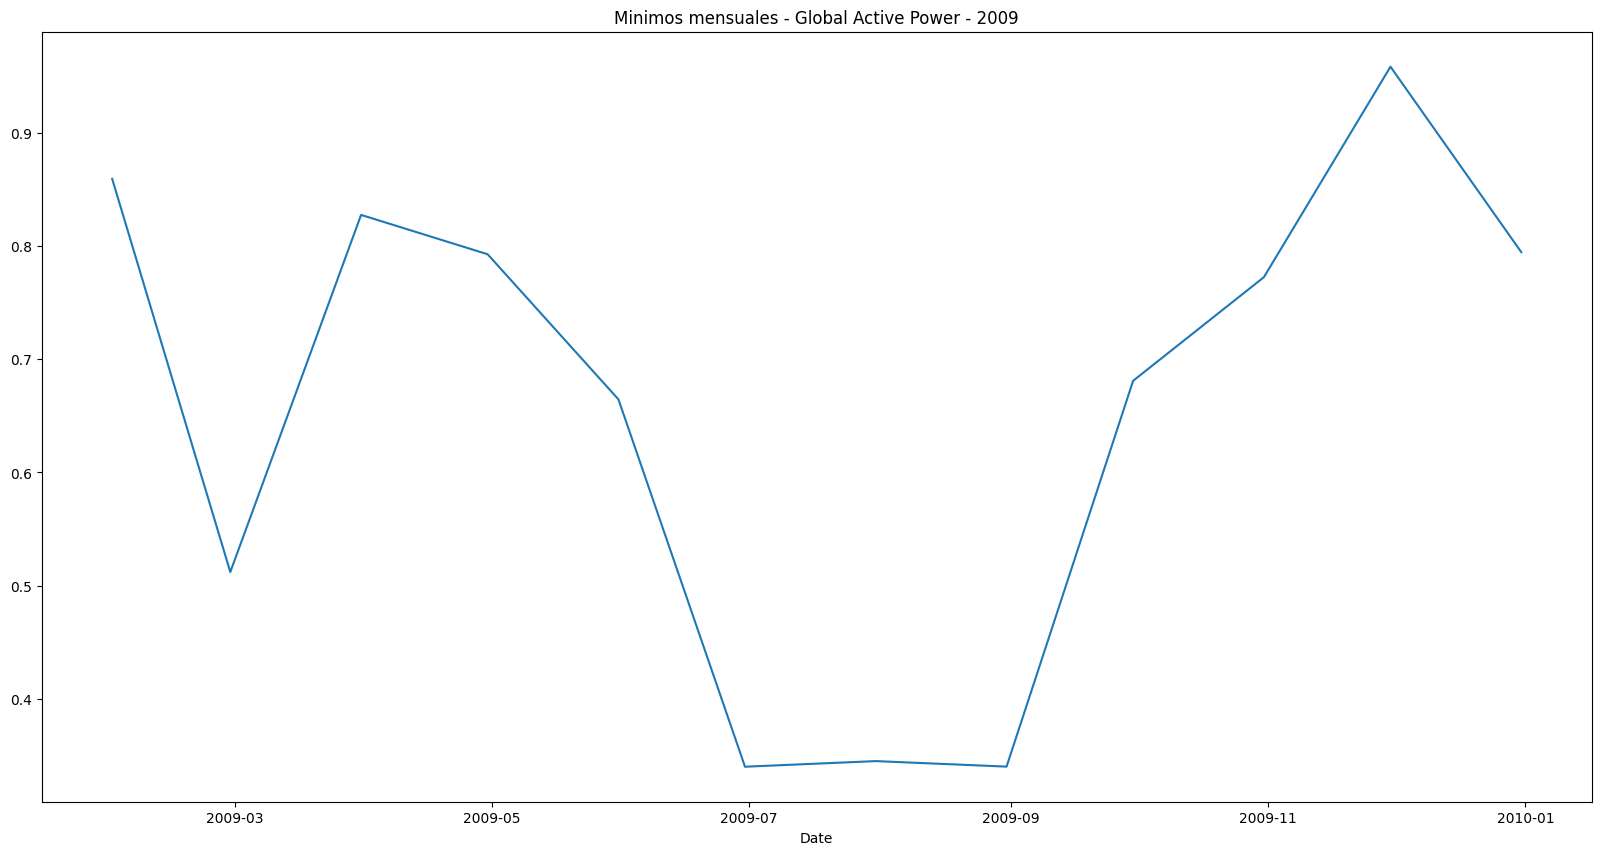

In [17]:
# Plot the monthly data by year with target Global_active_power as y-axis and datetime as x-axis with line plot

for i in range(2007, 2010):
    plt.figure(figsize=(20, 10))
    plt.plot(df_active_power[df_active_power.index.year == i]['Global_active_power'].resample('M').min().index,
             df_active_power[df_active_power.index.year == i]['Global_active_power'].resample('M').min())
    plt.xlabel('Date')
    # plt.ylabel('Global Active Power')
    plt.title(f'Minimos mensuales - Global Active Power - {i}')
    plt.show()


Dado este análisis, se estima visualmente que anualmente la epoca en la cual se tiene un minimo es entre los meses 7 y 9.
A continuación se implementará un metodo para conocer el minimo de forma más precisa.

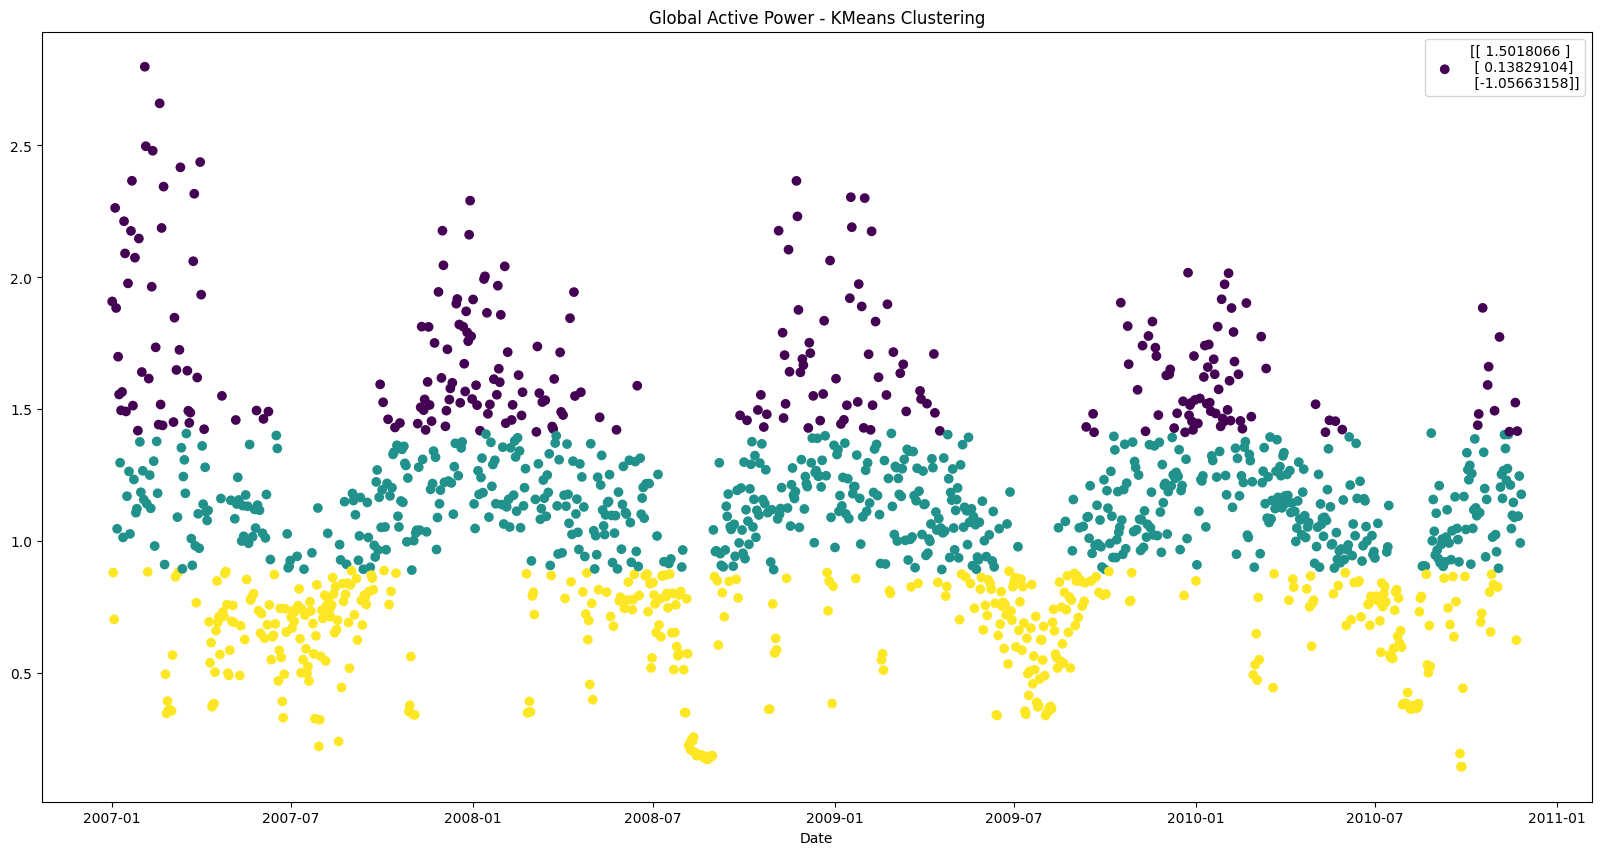

In [31]:
from lib2to3.pgen2.token import LBRACE
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


sc_dfa = StandardScaler()
df_std = sc_dfa.fit_transform(df_active_power.astype(float))

# KMeans Clustering

kmeans = KMeans(n_clusters=3, random_state=0).fit(df_std)
kmeans_labels = kmeans.labels_
kmeans_cluster_centers = kmeans.cluster_centers_

# Plot the data with target Global_active_power as y-axis and datetime as x-axis with line plot and color the data based on cluster
plt.figure(figsize=(20, 10))
# give a legend to the clusters
plt.scatter(df_active_power.index,
            df_active_power['Global_active_power'], c=kmeans_labels, label=kmeans_cluster_centers)
plt.xlabel('Date')
# create a legend for each color in the scatter plot
plt.legend()
plt.title('Global Active Power - KMeans Clustering')
plt.show()


Se puede apreciar que el grupo amarillo es el que tiene un consumo menor en los meses 7 a 9 por cada año, confirmado por el grafico anterior.

los grupos de división/cluster se ven separados acorde al problema, por ello no es necesario utilizar otros metodos de seleccion de numero de clusters, como K-Fold Crossvalidation

### Pronóstico de consumo de energia electrica

In [32]:
%pip install skforecast


  Using cached tqdm-4.62.0-py2.py3-none-any.whl (76 kB)
     ---------------------------------------- 7.5/7.5 MB 9.4 MB/s eta 0:00:00
  Using cached numpy-1.22.0-cp38-cp38-win_amd64.whl (14.7 MB)
  Using cached pandas-1.4.0-cp38-cp38-win_amd64.whl (10.6 MB)
  Using cached statsmodels-0.13.0-cp38-none-win_amd64.whl (9.4 MB)
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.64.1
    Uninstalling tqdm-4.64.1:
      Successfully uninstalled tqdm-4.64.1
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.3
    Uninstalling numpy-1.23.3:
      Successfully uninstalled numpy-1.23.3
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\MatiasPoblete\\anaconda3\\envs\\stdev2\\Lib\\site-packages\\~umpy\\.libs\\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll'
Consider using the `--user` option or check the permissions.



In [38]:
import numpy as np
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from sklearn.ensemble import RandomForestRegressor


Train dates : 2007-01-01 00:00:00 --- 2008-12-31 00:00:00  (n=731)
Test dates  : 2009-01-01 00:00:00 --- 2009-12-31 00:00:00  (n=365)


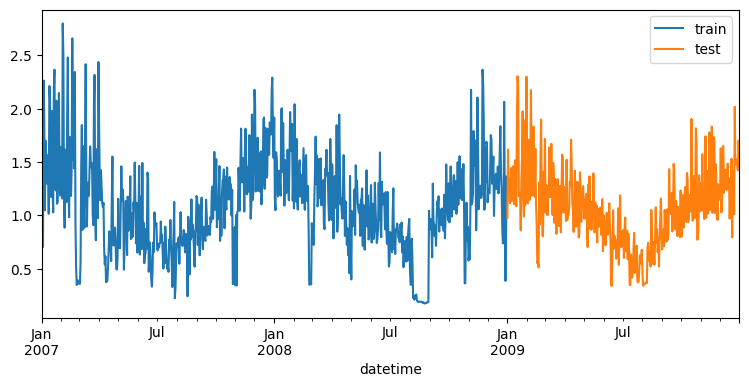

In [35]:

# Split the data into train and test data

train = df_active_power[df_active_power.index.year < 2009]
test = df_active_power[df_active_power.index.year == 2009]

print(
    f"Train dates : {train.index.min()} --- {train.index.max()}  (n={len(train)})")
print(
    f"Test dates  : {test.index.min()} --- {test.index.max()}  (n={len(test)})")

fig, ax = plt.subplots(figsize=(9, 4))
train['Global_active_power'].plot(ax=ax, label='train')
test['Global_active_power'].plot(ax=ax, label='test')
ax.legend()


In [52]:
# Create the forecaster and fit the model to the data with the best parameters found

forecaster = ForecasterAutoreg(
    regressor=RandomForestRegressor(random_state=123),
    lags=24,
)

forecaster.fit(y=train['Global_active_power'])
forecaster


ForecasterAutoreg 
Regressor: RandomForestRegressor(random_state=123) 
Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24] 
Window size: 24 
Included exogenous: False 
Type of exogenous variable: None 
Exogenous variables names: None 
Training range: [Timestamp('2007-01-01 00:00:00'), Timestamp('2008-12-31 00:00:00')] 
Training index type: DatetimeIndex 
Training index frequency: D 
Regressor parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 123, 'verbose': 0, 'warm_start': False} 
Creation date: 2022-10-26 23:08:38 
Last fit date: 2022-10-26 23:08:40 
Skforecast version: 0.4.3 

In [53]:
steps = len(test)
y_pred = forecaster.predict(steps=steps)
y_pred


2009-01-01    1.146995
2009-01-02    1.164960
2009-01-03    1.506626
2009-01-04    1.412290
2009-01-05    1.267663
                ...   
2009-12-27    1.319777
2009-12-28    1.297955
2009-12-29    1.340057
2009-12-30    1.320721
2009-12-31    1.295885
Freq: D, Name: pred, Length: 365, dtype: float64

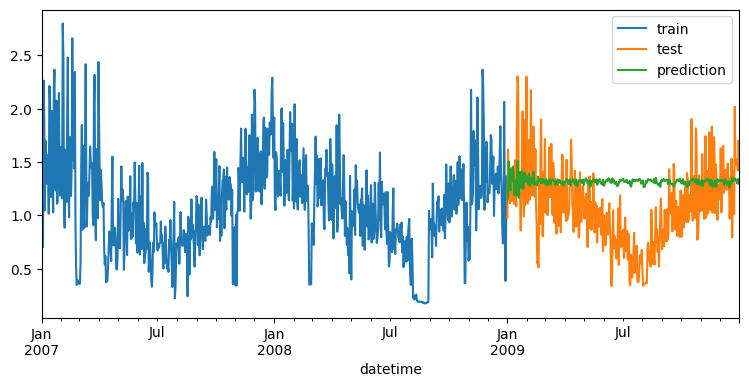

In [54]:
# Plot the train, test and predicted data

fig, ax = plt.subplots(figsize=(9, 4))
train['Global_active_power'].plot(ax=ax, label='train')
test['Global_active_power'].plot(ax=ax, label='test')
y_pred.plot(ax=ax, label='prediction')
ax.legend()


Como se ve en el gráfico, el modelo predice con poca precision la tendencia de los datos, es por ello que se mejorará la precisión utilizando metodos de Hyperparameter tuning

In [55]:
# Calculate the mean absolute error

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(test['Global_active_power'], y_pred)
print(f"Mean Absolute Error: {mae}")


Mean Absolute Error: 0.3554534893835615


In [57]:
# Hyperparameter tuning
from skforecast.model_selection import grid_search_forecaster

forecaster = ForecasterAutoreg(
    regressor=RandomForestRegressor(random_state=123),
    lags=24,
)

# Lags used as predictors
lags_grid = [10, 20, 24]

# Regressor's hyperparameters
param_grid = {'n_estimators': [100, 500],
            'max_depth': [3, 5, 10]}

results_grid_search = grid_search_forecaster(
    forecaster=forecaster,
    y=train['Global_active_power'],
    param_grid=param_grid,
    lags_grid=lags_grid,
    steps=steps,
    refit=True,
    metric='mean_squared_error',
    initial_train_size=int(len(train['Global_active_power'])*0.5),
    fixed_train_size=False,
    return_best=True,
    verbose=False
)


Number of models compared: 18


loop lags_grid: 100%|██████████████████████████████████████| 3/3 [08:58<00:00, 179.54s/it]


`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10] 
  Parameters: {'max_depth': 3, 'n_estimators': 100}
  Backtesting metric: 0.5420637692903911



In [58]:
results_grid_search

,lags,params,metric,max_depth,n_estimators
0,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'max_depth': 3, 'n_estimators': 100}",0.542064,3,100
1,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'max_depth': 3, 'n_estimators': 500}",0.554909,3,500
2,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'max_depth': 5, 'n_estimators': 100}",0.566185,5,100
3,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'max_depth': 5, 'n_estimators': 500}",0.570038,5,500
13,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 3, 'n_estimators': 500}",0.637142,3,500
12,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 3, 'n_estimators': 100}",0.664066,3,100
6,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 3, 'n_estimators': 100}",0.678454,3,100
7,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 3, 'n_estimators': 500}",0.690746,3,500
15,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 5, 'n_estimators': 500}",0.703893,5,500
4,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'max_depth': 10, 'n_estimators': 100}",0.780935,10,100


Ya que el metodo de skforecast no es el mejor y requiere mayor numero de ajuste en sus parametros, se procede a modelar los datos usando NeuralProphet

In [ ]:
%pip install neuralprophet

In [72]:
# convert the index into a column named ds
df_active_power.reset_index(inplace=True)
df_active_power.rename(columns={'index': 'ds'}, inplace=True)
df_active_power.rename(columns={'datetime': 'ds'}, inplace=True)
df_active_power.rename(columns={'Global_active_power': 'y'}, inplace=True)

df_active_power.head()

,ds,Global_active_power
0,2007-01-01,1.909031
1,2007-01-02,0.881414
2,2007-01-03,0.704204
3,2007-01-04,2.263481
4,2007-01-05,1.884281


In [89]:
from neuralprophet import NeuralProphet

m = NeuralProphet(
    # n_forecasts=365,
    # n_lags=730,
)
metrics = m.fit(df_active_power, freq="D")

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.93% of the data.
NP.df_utils INFO  Major frequency D corresponds to 99.93% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
NP.df_utils INFO  Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
NP.config  INFO  Setting normalization to global as only one dataframe provided for training.
WARNING - (py.warnings._showwarnmsg) - c:\Users\MatiasPoblete\anaconda3\envs\stdev2\lib\site-packages\neuralprophet\df_utils.py:193: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, "ds"] = pd.to_datetime(df.loc[:, "ds"])

py.warnings WARNI

In [90]:
df_future = m.make_future_dataframe(df_active_power, periods=365)
forecast = m.predict(df_future)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.93% of the data.
NP.df_utils INFO  Major frequency D corresponds to 99.93% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
NP.df_utils INFO  Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
NP.df_utils INFO  Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.726% of the data.
NP.df_utils INFO  Major frequency D corresponds to 99.726% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
NP.df_utils INFO  Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.726% of the data.
NP.df_utils INFO  Major frequency D corresponds to 99.726% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequenc

### Gráficos de pronstico y componentes

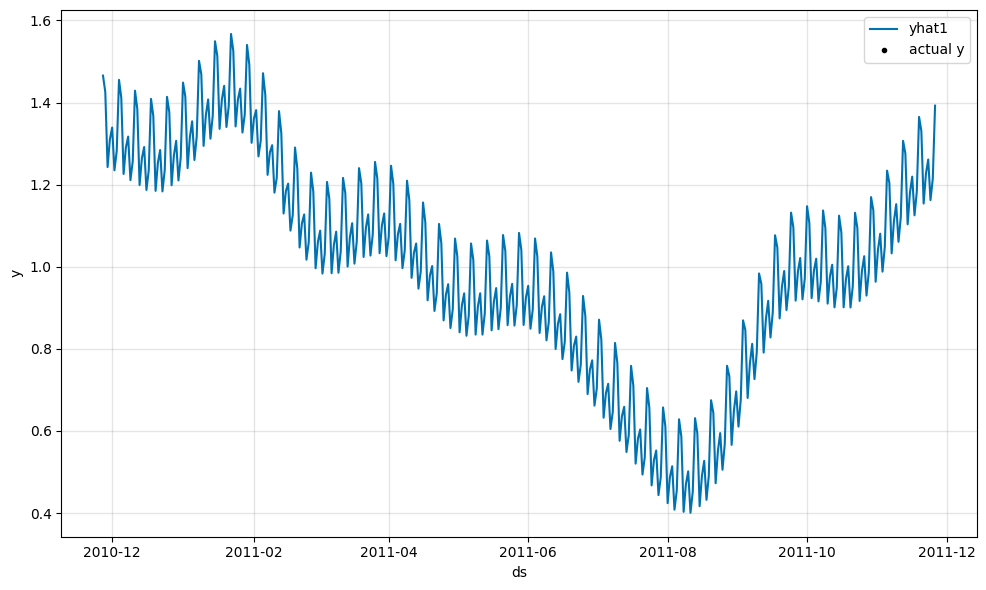

In [91]:
# Plot the forecast
fig_forecast = m.plot(forecast)

In [101]:
# Last five rows of the forecast dataframe
forecast[['ds', 'yhat1']].tail()

,ds,yhat1
360,2011-11-22,1.226477
361,2011-11-23,1.261289
362,2011-11-24,1.162464
363,2011-11-25,1.214492
364,2011-11-26,1.392478


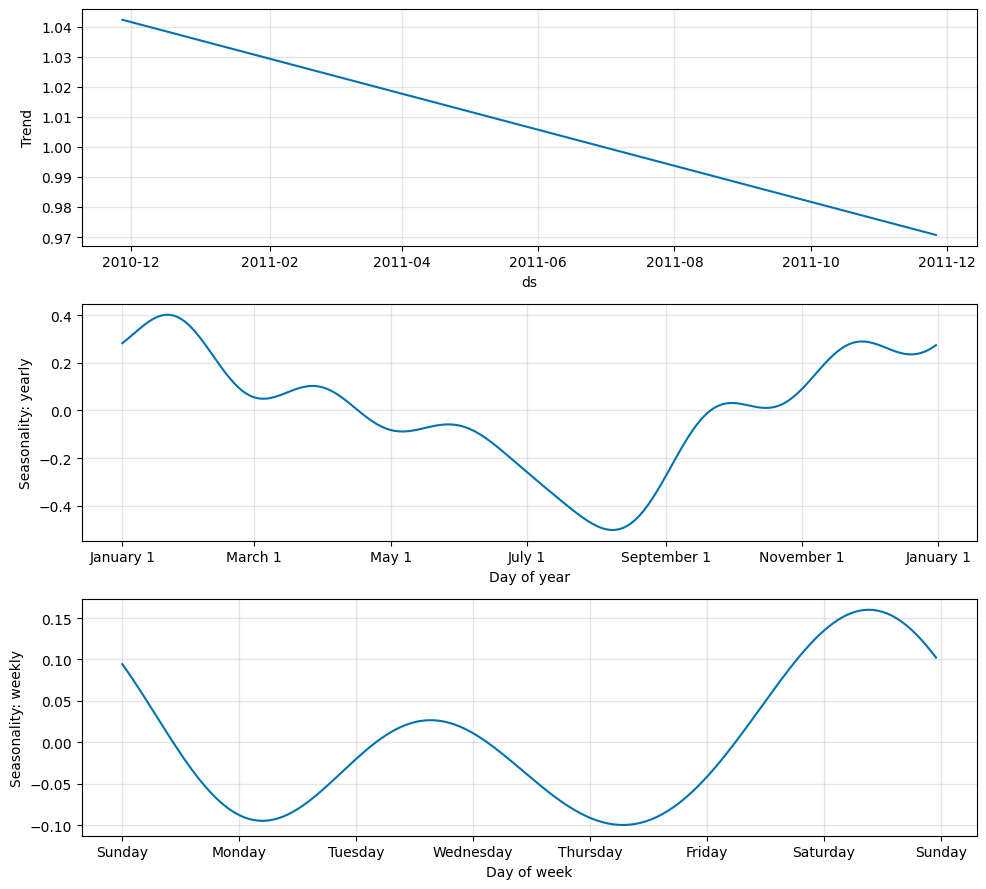

In [92]:
#Plot the forecast components
fig_components = m.plot_components(forecast)

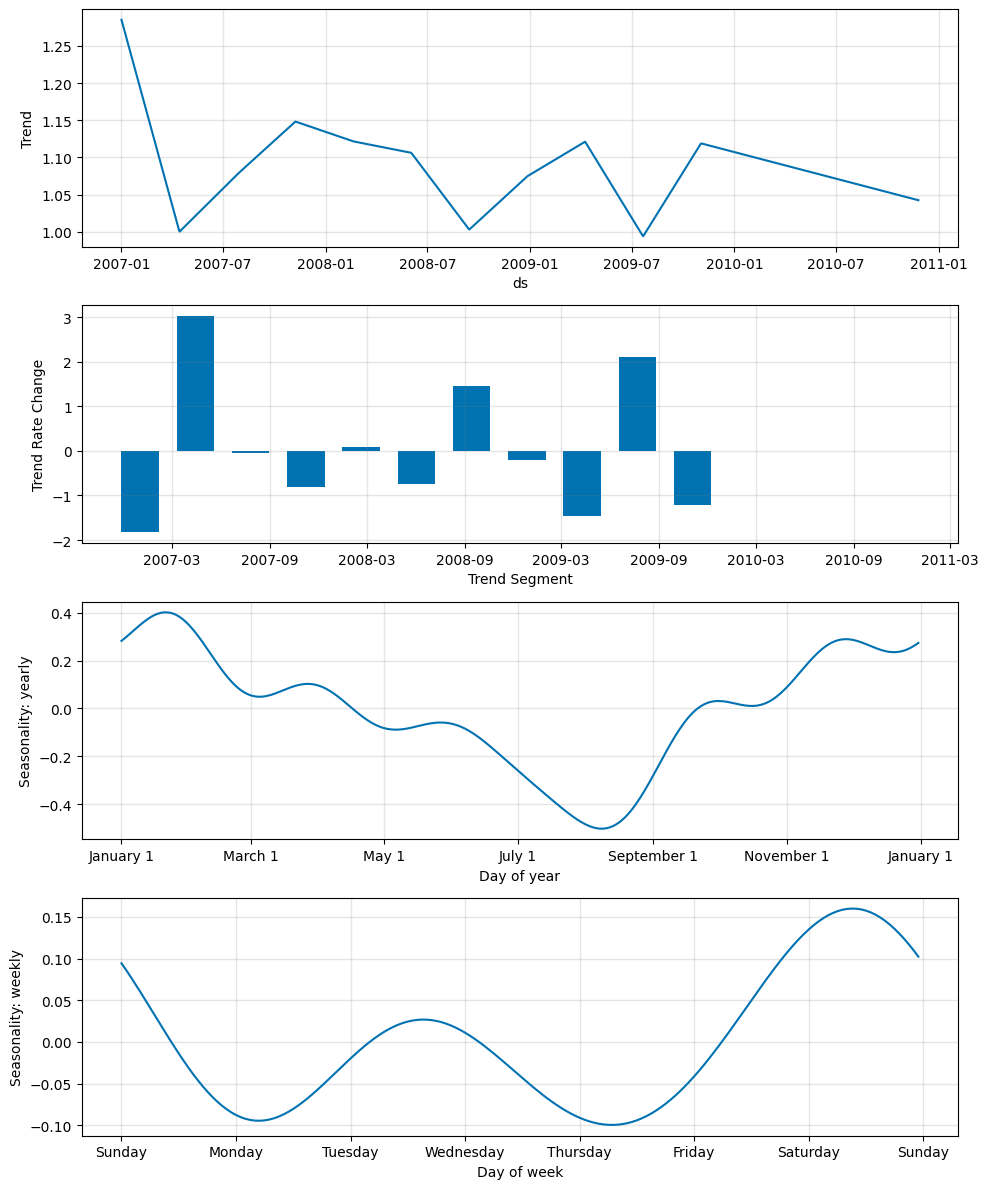

In [93]:
fig_model = m.plot_parameters()